In [2]:
import pandas as pd

In [27]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

In [99]:
import numpy as np

In [4]:
heart_data=pd.read_csv('Desktop/uci_data/heart.csv')

In [5]:
heart_data.head() #This is how the data set looks like from scratch

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
heart_data.shape #NO. of patients and columns/attributes

(303, 14)

In [142]:
heart_data['sex']=heart_data['sex'].replace([0,1],['female','male'])
heart_data['cp']=heart_data['cp'].replace([0,1,2,3],['typical angina', 'atypical angina', 'non-anginal pain', 'no pain'])
heart_data['target']=heart_data['target'].replace([0,1],['not at risk', 'at risk'])
heart_data['fbs']=heart_data['fbs'].replace([0,1],['normal','fast blood'])
heart_data['slope']=heart_data['slope'].replace([0,1,2], ['upsloping', 'flat', 'downsloping'])
heart_data['restecg']=heart_data['restecg'].replace([0,1],['False','True'])
heart_data['exang']=heart_data['exang'].replace([0,1],['False','True'])
heart_data['thal']=heart_data['thal'].replace([1,2,3], ['normal', 'fixed detect','reversable detect'])

In [143]:
heart_data.head() #bring back categorical data entry

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,no pain,145,233,fast blood,False,150,False,2.3,upsloping,0,normal,at risk
1,37,male,non-anginal pain,130,250,normal,True,187,False,3.5,upsloping,0,fixed detect,at risk
2,41,female,atypical angina,130,204,normal,False,172,False,1.4,flat,0,fixed detect,at risk
3,56,male,atypical angina,120,236,normal,True,178,False,0.8,flat,0,fixed detect,at risk
4,57,female,typical angina,120,354,normal,True,163,True,0.6,flat,0,fixed detect,at risk


In [157]:
age=heart_data['age']
sex=heart_data['sex']
cp=heart_data['cp']
chol=heart_data['chol']
thalach=heart_data['thalach'] #maximum heart rate achieved
fbs=heart_data['fbs'] #fasting blood sugar
target=heart_data['target']
ca=heart_data['ca'] #NO. of major vessels colored by flourosopy
oldpeak=heart_data['oldpeak'] #ST depression induced by exercise relative to rest
slope=heart_data['slope'] #the slope of the peak exercise ST segment

{'no pain': 23, 'non-anginal pain': 87, 'atypical angina': 50, 'typical angina': 143}


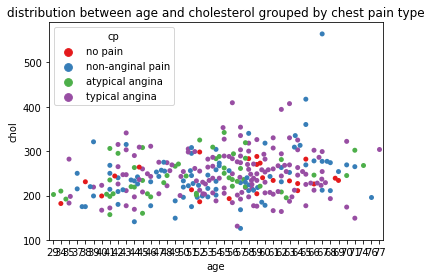

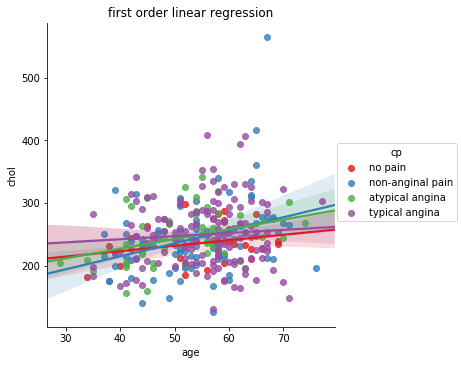

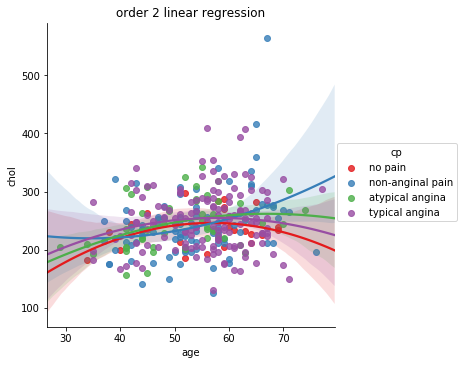

In [103]:
cp_count={}
for cptype in heart_data['cp']:
    if cptype in cp_count.keys():
        cp_count[cptype] += 1
    else:
        cp_count[cptype] = 1
        
print(cp_count)

sns.swarmplot(x='age', y='chol', data=heart_data, hue='cp', palette='Set1') #use Set1 for distinct colors
plt.title('distribution between age and cholesterol grouped by chest pain type')
sns.lmplot(x='age', y='chol', data=heart_data, hue='cp', palette='Set1')
plt.title('first order linear regression')
sns.lmplot(x='age', y='chol', data=heart_data, hue='cp', palette='Set1', order=2)
plt.title('order 2 linear regression')

plt.show()

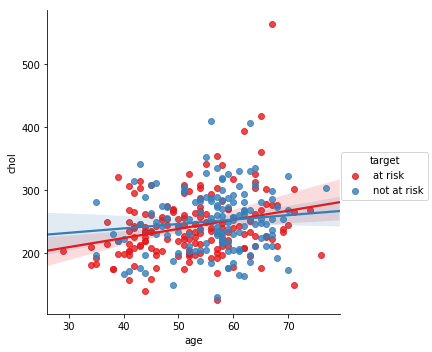

In [98]:
sns.lmplot(x='age', y='chol', data=heart_data, hue='target', palette='Set1')

In [ ]:
# we can observe that age and cholesterol level are not necessilarily associated with each other 

In [122]:
(np.corrcoef(age, chol)[0,1])**2 #check if it matches the result 

0.04565826911946998

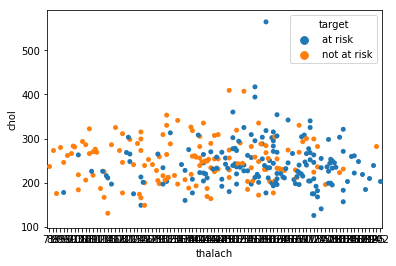

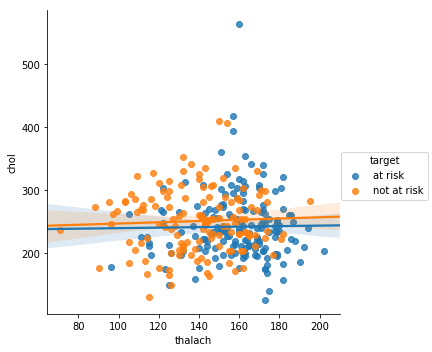

In [128]:
sns.swarmplot(x='thalach', y='chol', data=heart_data, hue='target')

sns.lmplot(x='thalach', y='chol', data=heart_data, hue='target')

plt.show()

In [125]:
(np.corrcoef(thalach, chol)[0,1])**2

9.880039224287711e-05

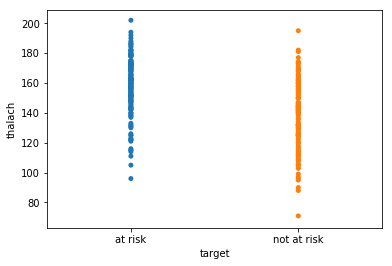

In [121]:
sns.stripplot(x='target', y='thalach', data=heart_data)

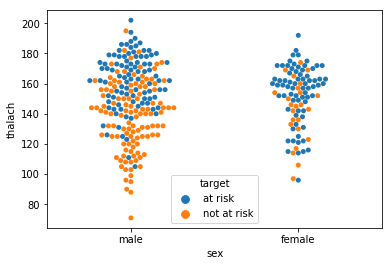

In [131]:
sns.swarmplot(x='sex', y='thalach', data=heart_data, hue='target')

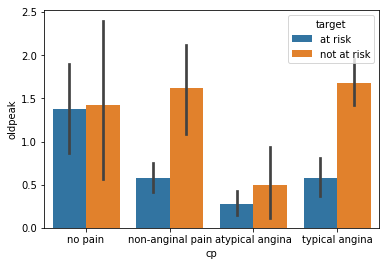

In [153]:
sns.barplot(x='cp', y='oldpeak', data=heart_data, hue='target')

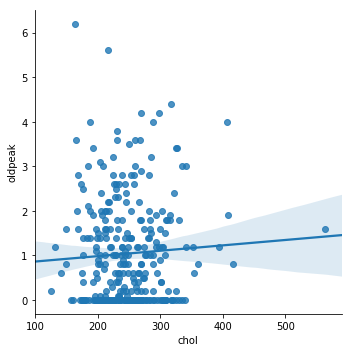

In [155]:
sns.lmplot(x='chol', y='oldpeak', data=heart_data)

In [158]:
np.corrcoef(oldpeak, chol)[0,1]

0.053951919986993786